In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.stats import describe
from sklearn.metrics import mean_absolute_error

#leer archivo csv
archivo_csv = r"C:\Users\hctrl\OneDrive\Tesis\Experimento\Temperatura Máxima\ConfExp.csv"
datos = pd.read_csv(archivo_csv)

pd.set_option('display.max_rows', None)  # Mostrar todas las filas

print(datos)

        ID_CIDERH  TEMP_MAX_RBE  Anio  Mes  Dia
0      M_001_B_II     23.489938  1993    1    1
1      M_001_B_II     23.655504  1993    1    2
2      M_001_B_II     22.326204  1993    1    3
3      M_001_B_II     22.319933  1993    1    4
4      M_001_B_II     22.288026  1993    1    5
5      M_001_B_II     22.290369  1993    1    6
6      M_001_B_II     21.545183  1993    1    7
7      M_001_B_II     21.047197  1993    1    8
8      M_001_B_II     20.178224  1993    1    9
9      M_001_B_II     20.679002  1993    1   10
10     M_001_B_II     21.066087  1993    1   11
11     M_001_B_II     19.499216  1993    1   12
12     M_001_B_II     19.246675  1993    1   13
13     M_001_B_II     17.930193  1993    1   14
14     M_001_B_II     19.884973  1993    1   15
15     M_001_B_II     19.977312  1993    1   16
16     M_001_B_II     21.606622  1993    1   17
17     M_001_B_II     21.564149  1993    1   18
18     M_001_B_II     20.943056  1993    1   19
19     M_001_B_II     21.220605  1993   

In [4]:
# Cargar el conjunto de datos original
df_original = pd.read_csv(r"C:\Users\hctrl\OneDrive\Tesis\Experimento\Temperatura Máxima\ConfExp.csv")

# Crear un directorio para almacenar los archivos CSV y gráficos
output_directory = 'Resultados'
os.makedirs(output_directory, exist_ok=True)

# Número de días continuos con datos vacíos
num_dias_vacios = 15

for i in range(num_dias_vacios):
    # Crear una copia del DataFrame original para cada iteración
    df_temp = df_original.copy()

    # Generar vacíos temporales para la estación M_015_A_II en la fecha 7/1/2004 y siguientes días
    fecha_vacio = pd.to_datetime(f'7/{i + 1}/2004', format='%m/%d/%Y')
    df_temp.loc[(df_temp['ID_CIDERH'] == 'M_015_A_II') & (df_temp['Mes'] == fecha_vacio.month) & (df_temp['Dia'] <= fecha_vacio.day) & (df_temp['Anio'] == fecha_vacio.year), 'TEMP_MAX_RBE'] = None

    # Crear el nombre del archivo CSV
    csv_filename = f'TempMax_con_vacios_{i + 1}.csv'
    
    # Crear el directorio para cada archivo CSV
    csv_directory = os.path.join(output_directory, csv_filename.replace('.csv', ''))
    os.makedirs(csv_directory, exist_ok=True)
    
    # Guardar el nuevo conjunto de datos con los vacíos temporales en el archivo CSV
    csv_path = os.path.join(csv_directory, csv_filename)
    df_temp.to_csv(csv_path, index=False)

    # Configurar la opción para mostrar todas las filas
    pd.set_option('display.max_rows', None)

    # Leer el archivo CSV
    df = pd.read_csv(csv_path)

    # Filtrar datos para la estación ID_CIDERH M_015_A_II
    df_estacion = df[df['ID_CIDERH'] == 'M_015_A_II']

    # Crear una columna de fecha combinando mes, día y año
    df_estacion.loc[:, 'Fecha'] = pd.to_datetime(df_estacion['Anio'].astype(str) + '-' + df_estacion['Mes'].astype(str) + '-' + df_estacion['Dia'].astype(str), errors='coerce')
    
    # Filtrar por el año en el que se crearon los vacíos
    filtro_anio_creacion_vacios = df_estacion['Fecha'].dt.year == fecha_vacio.year
    df_estacion = df_estacion[filtro_anio_creacion_vacios]
    
    # Configurar el estilo del gráfico
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Crear el gráfico de líneas para la temperatura mínima
    plt.plot(df_estacion['Fecha'], df_estacion['TEMP_MAX_RBE'], label='TS missing data', color='blue')

    # Configurar el gráfico
    plt.title(f'TS with {i + 1} missing daily data', fontsize=16, fontweight='bold')
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Maximum Temperature (°C)', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend()

    # Guardar el gráfico en el directorio correspondiente
    plt.savefig(os.path.join(csv_directory, f'TEMP_MAX_RBE_Grafico_{i + 1}.png'))
    plt.close()  # Cerrar el gráfico para evitar la superposición en la siguiente iteración
    
print("Vacios generados")

C:\Users\hctrl\AppData\Local\Temp\ipykernel_11380\4211893704.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estacion.loc[:, 'Fecha'] = pd.to_datetime(df_estacion['Anio'].astype(str) + '-' + df_estacion['Mes'].astype(str) + '-' + df_estacion['Dia'].astype(str), errors='coerce')
C:\Users\hctrl\AppData\Local\Temp\ipykernel_11380\4211893704.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estacion.loc[:, 'Fecha'] = pd.to_datetime(df_estacion['Anio'].astype(str) + '-' + df_estacion['Mes'].astype(

Vacios generados


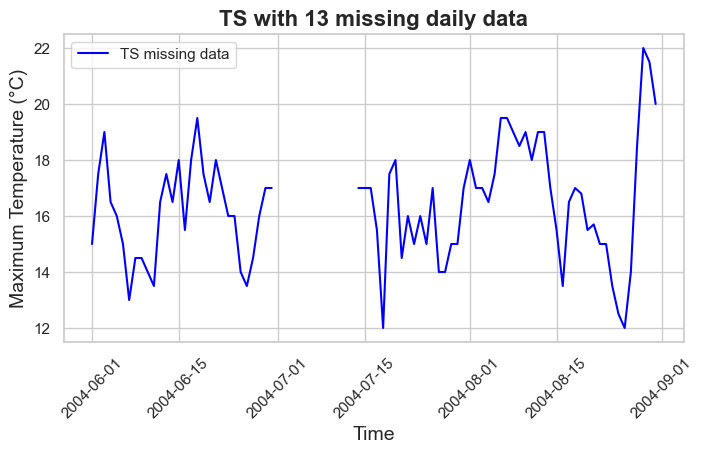

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer datos originales
df_original = pd.read_csv(r"C:\Users\hctrl\OneDrive\Tesis\Experimento\Temperatura Máxima\Resultados\TempMax_con_vacios_13\TempMax_con_vacios_13.csv")

# Combinar las columnas 'Anio', 'Mes', 'Dia' en una columna de tipo string con formato de fecha
df_original['FECHA_RBE'] = pd.to_datetime(df_original['Anio'].astype(str) + '-' + df_original['Mes'].astype(str) + '-' + df_original['Dia'].astype(str))


# Filtrar datos originales para incluir solo los meses 6, 7 y 8 de 2004 y la estación M_015_A_II
df_original_filtrado = df_original[(df_original['FECHA_RBE'].dt.month >= 6) & 
                                   (df_original['FECHA_RBE'].dt.month <= 8) & 
                                   (df_original['FECHA_RBE'].dt.year == 2004) & 
                                   (df_original['ID_CIDERH'] == 'M_015_A_II')]

# Configurar el estilo del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

# Graficar datos originales
plt.plot(df_original_filtrado['FECHA_RBE'], df_original_filtrado['TEMP_MAX_RBE'], label='TS missing data', color='blue')

# Configurar el gráfico)
plt.title('TS with 13 missing daily data', fontsize=16, fontweight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Maximum Temperature (°C)', fontsize=14)
plt.xticks(rotation=45)
plt.legend()

plt.savefig('ts_m_015_a_ii.svg', format='svg', bbox_inches='tight')

plt.show()

In [7]:
from sklearn.impute import KNNImputer

# Cargar los 15 dataframes con valores faltantes
dataframes_con_vacios = [pd.read_csv(os.path.join('Resultados', f'TempMax_con_vacios_{i + 1}', f'TempMax_con_vacios_{i + 1}.csv')) for i in range(15)]

# Configurar el imputador KNN
imputer = KNNImputer(n_neighbors=3)  #Ajustar el número de vecinos

# Imputar valores faltantes en cada DataFrame
dataframes_imputados_knn = []

for df in dataframes_con_vacios:
    # Seleccionar las columnas necesarias para la imputación
    features = df.drop(columns=['ID_CIDERH'])
    # Imputar valores faltantes
    imputed_array = imputer.fit_transform(features)
    # Asignar los valores imputados a las columnas correspondientes
    df['TEMP_MAX_RBE'] = imputed_array[:, features.columns.get_loc('TEMP_MAX_RBE')]
    dataframes_imputados_knn.append(df)

# Guardar los 15 dataframes imputados con KNN
output_directory_imputados_knn = 'Resultados_Imputacion_KNN'
os.makedirs(output_directory_imputados_knn, exist_ok=True)

for i, df_imputado_knn in enumerate(dataframes_imputados_knn):
    csv_filename_imputado_knn = f'TempMax_imputado_KNN_{i + 1}.csv'
    csv_path_imputado_knn = os.path.join(output_directory_imputados_knn, csv_filename_imputado_knn)
    df_imputado_knn.to_csv(csv_path_imputado_knn, index=False)

print("Imputación realizada usando la técnica de KNN")

Imputación realizada usando la técnica de KNN


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


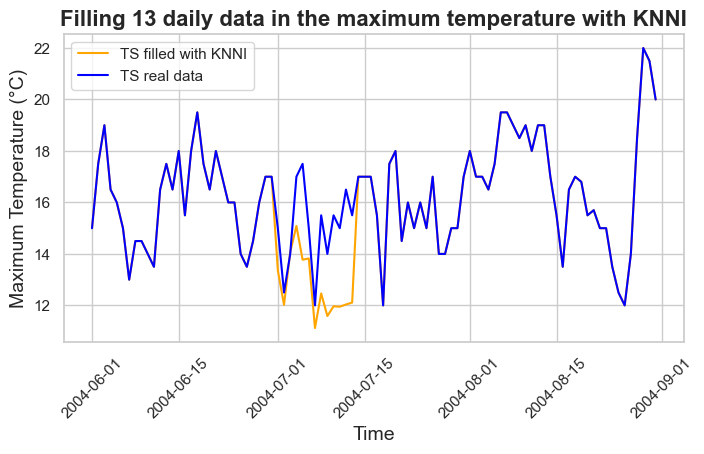

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer datos originales
df_original = pd.read_csv(r"C:\Users\hctrl\OneDrive\Tesis\Experimento\Temperatura Máxima\ConfExp.csv")

# Combinar las columnas 'Anio', 'Mes', 'Dia' en una columna de tipo string con formato de fecha
df_original['FECHA_RBE'] = pd.to_datetime(df_original['Anio'].astype(str) + '-' + df_original['Mes'].astype(str) + '-' + df_original['Dia'].astype(str))

# Leer datos imputados
df_imputado = pd.read_csv(r"C:\Users\hctrl\OneDrive\Tesis\Experimento\Temperatura Máxima\Resultados_Imputacion_KNN\TempMax_imputado_KNN_13.csv")

# Combinar las columnas 'Anio', 'Mes', 'Dia' en una columna de tipo string con formato de fecha
df_imputado['FECHA_RBE'] = pd.to_datetime(df_imputado['Anio'].astype(str) + '-' + df_imputado['Mes'].astype(str) + '-' + df_imputado['Dia'].astype(str))

# Filtrar datos originales para incluir solo los meses 6, 7 y 8 de 2004 y la estación M_015_A_II
df_original_filtrado = df_original[(df_original['FECHA_RBE'].dt.month >= 6) & 
                                   (df_original['FECHA_RBE'].dt.month <= 8) & 
                                   (df_original['FECHA_RBE'].dt.year == 2004) & 
                                   (df_original['ID_CIDERH'] == 'M_015_A_II')]

# Filtrar datos imputados para incluir solo los meses 6, 7 y 8 de 2004 y la estación M_015_A_II
df_imputado_filtrado = df_imputado[(df_imputado['FECHA_RBE'].dt.month >= 6) & 
                                    (df_imputado['FECHA_RBE'].dt.month <= 8) & 
                                    (df_imputado['FECHA_RBE'].dt.year == 2004) & 
                                    (df_imputado['ID_CIDERH'] == 'M_015_A_II')]

# Configurar el estilo del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

# Graficar datos imputados
plt.plot(df_imputado_filtrado['FECHA_RBE'], df_imputado_filtrado['TEMP_MAX_RBE'], label='TS filled with KNNI', color='orange')

# Graficar datos originales
plt.plot(df_original_filtrado['FECHA_RBE'], df_original_filtrado['TEMP_MAX_RBE'], label='TS real data', color='blue')

# Configurar el gráfico
plt.title('Filling 13 daily data in the maximum temperature with KNNI', fontsize=16, fontweight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Maximum Temperature (°C)', fontsize=14)
plt.xticks(rotation=45)
plt.legend()

# Guarda la imagen en formato .svg
plt.savefig('ts_fill_knni.eps', format='eps', bbox_inches='tight')

plt.show()